<a href="https://colab.research.google.com/github/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/Examen01_2024_1-Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, asi podemos despejar  de la ecuación para $x$ el tiempo:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la siguiente  ecuación trascendental.


\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

 Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













# Solución 


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}


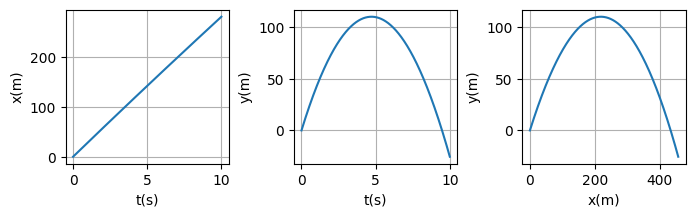

In [151]:
# Primera intucion respecto al problema
import numpy as np
import matplotlib.pylab as plt
import scipy as sc


def posX(t, v0x, b ):
    x=(v0x/b)*(1-np.exp(-b*t))
    return x

def posY(t, v0y, b, g ):
    y=(1/b)*(g/b + v0y)*(1-np.exp(-b*t))-(g/b)*t
    return y


##########################
t = np.linspace(0, 10, 1000)
v0 = 55
angle=45
b=0.005
g=9.8
theta = np.deg2rad(angle)
v0x = v0*np.cos(angle)
v0y = v0*np.sin(angle)


###########################
fig,axs =plt.subplots( figsize=(8,2), nrows=1, ncols=3 )
ax = axs.flatten()
ax[0].plot(t, posX(t, v0x, b), label="x")
ax[1].plot(t, posY(t, v0y, b, g),  label="y")
ax[2].plot(posX(t, v0y, b), posY(t, v0y, b, g),  label="y")
ax[0].set_xlabel("t(s)")
ax[0].set_ylabel("x(m)")
ax[0].grid()
ax[1].set_xlabel("t(s)")
ax[1].set_ylabel("y(m)")
ax[1].grid()
ax[2].set_xlabel("x(m)")
ax[2].set_ylabel("y(m)")
ax[2].grid()
plt.subplots_adjust(wspace=0.4)  # Puedes ajustar este valor según tus preferencias

plt.show()

Ahora determinemos las raices de y.



\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

y el tiempo de vuelo:

Determinemos el tiempo de vuelo:


\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


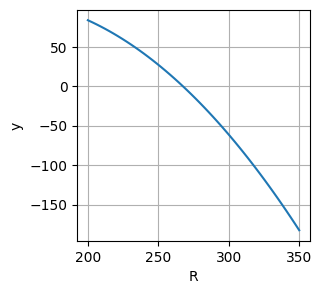

In [152]:
def fun(R, angle,v0y, v0x, b ):
    y = (g/b+v0y)*R/v0x + (g/b**2)*np.log(1-R*b/v0x)
    return y


def tiempo_vuelo(R, v0x, b, ):    
    tv= -1/b*(np.log(1-R*b/v0x))
    return tv

R = np.linspace(200, 350)
y_ = fun(R, angle,v0y, v0x, b )

plt.figure(figsize=(3,3))
plt.plot(R, y_)
plt.xlabel("R")
plt.ylabel("y")
plt.grid()
plt.show()

Lo anterior muestra que la raiz esta cerca de 300, determinemosla con el metodo de la secante y el metodo de bisección

Secante: El valor máximo de y para theta 45 es de Rmax=267.406m
Bisection: El valor máximo de y para theta 45 es de Rmax=267.406m
El valor del tiempo de vuelo es 9.476s
La trayectoria de la particula es


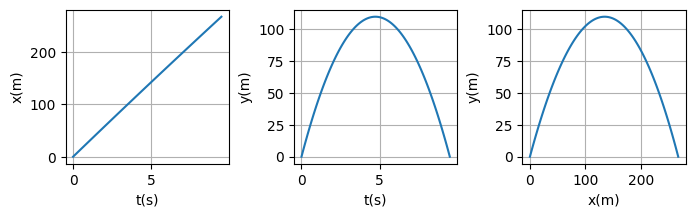

In [155]:
Rmax = sc.optimize.newton(fun, x0=300, args=(angle,v0y, v0x, b ))
Rmax1 = sc.optimize.bisect(fun, 200, 400, args=(angle,v0y, v0x, b ))
print(f"Secante: El valor máximo de y para theta {angle} es de Rmax={Rmax:.6}m")
print(f"Bisection: El valor máximo de y para theta {angle} es de Rmax={Rmax1:.6}m")

tv = tiempo_vuelo(Rmax, v0x, b, )
print(f"El valor del tiempo de vuelo es {tv:.4}s")

print("La trayectoria de la particula es")

t = np.linspace(0, tv, 100)


fig,axs =plt.subplots( figsize=(8,2), nrows=1, ncols=3 )
ax = axs.flatten()
ax[0].plot(t, posX(t, v0x, b), label="x")
ax[1].plot(t, posY(t, v0y, b, g),  label="y")
ax[2].plot(posX(t, v0x, b), posY(t, v0y, b, g),  label="y")
ax[0].set_xlabel("t(s)")
ax[0].set_ylabel("x(m)")
ax[0].grid()
ax[1].set_xlabel("t(s)")
ax[1].set_ylabel("y(m)")
ax[1].grid()
ax[2].set_xlabel("x(m)")
ax[2].set_ylabel("y(m)")
ax[2].grid()
plt.subplots_adjust(wspace=0.4)  # Puedes ajustar este valor según tus preferencias

plt.show()

Ahora construyamos múltiples trayectorias:

In [156]:
v0 = 40
angle = np.arange(5, 90, 5)
b = 0.009
g = 9.8

theta = np.deg2rad(angle)
Rmax_=np.zeros(len(theta))
Tv_=np.zeros(len(theta))

for i, t in  enumerate(theta):
    v0x = v0*np.cos(t)
    v0y = v0*np.sin(t)    
    Rmax_[i] = sc.optimize.newton(fun, x0=300, args=(t,v0y, v0x, b )) # Todos los Rmax
    Tv_[i] = tiempo_vuelo(Rmax_[i], v0x, b ) # Todos los tiempos de vuelo

Notese que el alcance máximo es de 45 grados


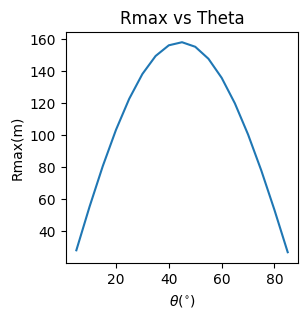

In [157]:
print("Notese que el alcance máximo es de 45 grados")
plt.figure(figsize=(3, 3))
plt.title("Rmax vs Theta")
plt.plot(np.rad2deg(theta),Rmax_)
plt.xlabel("$\\theta(^{\circ})$")
plt.ylabel("Rmax(m)")
plt.show()

Todas las trayectorias

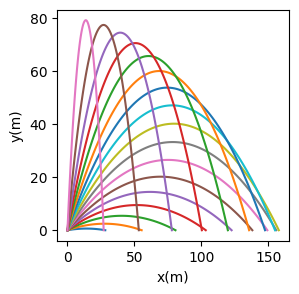

In [158]:
plt.figure(figsize=(3,3))
for i, t in  enumerate(theta):
    v0x = v0*np.cos(t)
    v0y = v0*np.sin(t)       
    Tv_[i] = tiempo_vuelo(Rmax_[i], v0x, b ) # Todos los tiempos de vuelo
    t = np.linspace(0,Tv_[i], 100)    
    plt.plot(posX(t, v0x, b), posY(t, v0y, b, g))

plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

# Con IA



**Hernan:** conoces estas ecuaciones 

    
\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}


**IA:** Sí, estas ecuaciones parecen describir el movimiento de un objeto bajo la influencia de la resistencia del aire o algún otro tipo de resistencia que es proporcional a la velocidad, lo cual es común en problemas de dinámica de fluidos. Aquí tienes una breve explicación:

La primera ecuación describe la posición ( x ) en función del tiempo ( t ), con ( v_{0x} ) siendo la velocidad inicial en la dirección ( x ) y ( b ) siendo el coeficiente de resistencia.

La segunda ecuación describe la posición ( y ) en función del tiempo ( t ), con ( g ) representando la aceleración debido a la gravedad y ( v_{0y} ) la velocidad inicial en la dirección ( y ).

La tercera ecuación da la velocidad ( v_x ) en la dirección ( x ) en función del tiempo ( t ), disminuyendo exponencialmente debido a la resistencia.

La cuarta ecuación proporciona la velocidad ( v_y ) en la dirección ( y ) en función del tiempo ( t ), también afectada por la resistencia y la gravedad.

Estas ecuaciones son típicas de un modelo de resistencia lineal, donde la fuerza de resistencia es directamente proporcional a la velocidad del objeto. ¿Hay algo específico que te gustaría saber sobre estas ecuaciones?


**Hernan:** sabes cual es la ecuacion que me permite determinar el alcance maximo.



**IA:** Para determinar el alcance máximo ( R ) en un movimiento con resistencia del aire, la ecuación se vuelve más compleja que en el caso ideal sin resistencia. No hay una fórmula cerrada simple como la que existe para el movimiento parabólico sin resistencia del aire, donde ( R = \frac{u^2\sin(2\theta)}{g} )1.

En presencia de resistencia del aire, el alcance máximo depende de la solución a las ecuaciones diferenciales que describen el movimiento, y generalmente se requiere el uso de métodos numéricos para encontrar una solución precisa. Estos métodos toman en cuenta las condiciones iniciales y las propiedades del medio a través del cual se mueve el objeto, como la densidad del aire y el coeficiente de resistencia ( b ).

Si necesitas calcular el alcance máximo para un caso específico con resistencia del aire, te recomendaría utilizar software de simulación o métodos numéricos que puedan integrar las ecuaciones de movimiento dadas tus condiciones iniciales y parámetros específicos. ¿Te gustaría saber más sobre cómo se podrían aplicar estos métodos o hay algo más en lo que pueda asistirte?


**Hernan:**  vale, vamos a intentar solucionarla, puedes determinar el alcance maximo, por ejemplo haciendo x=R, despejando el tiempo y despues encontrando y, por lo menos llegar a la ecuacion para y, escribelo en latex para que nos entendamos, sabes



**IA:** Entiendo, vamos a trabajar en la ecuación para el alcance máximo ( R ) en términos de ( y ). Primero, necesitamos expresar el tiempo ( t ) en términos de ( R ) usando la primera ecuación para ( x ):
\begin{equation}
 x = R = \frac{v_{0x}}{b}\left( 1-e^{-bt} \right) 
\end{equation}
Despejando para ( t ), obtenemos:
\begin{equation}
t = -\frac{1}{b} \ln \left(1 - \frac{bR}{v_{0x}}\right) 
\end{equation}

Ahora, sustituimos este valor de ( t ) en la segunda ecuación para ( y ), para obtener ( y ) en términos de ( R ):
\begin{equation}
y = \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)\left(1-e^{-\left(-\frac{1}{b} \ln \left(1 - \frac{bR}{v_{0x}}\right)\right)}\right)-\frac{g}{b}\left(-\frac{1}{b} \ln \left(1 - \frac{bR}{v_{0x}}\right)\right) 
\end{equation}

Simplificando, la ecuación para ( y ) en términos de ( R ) es:

\begin{equation}
y = \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)\left(\frac{bR}{v_{0x}}\right)+\frac{g}{b^2} \ln \left(1 - \frac{bR}{v_{0x}}\right)
\end{equation}


(

Esperada, no se si la tomo de una referencia o realmente la calculo la IA 

===============================
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}
=============================
)


Esta es la ecuación que relaciona ( y ) con el alcance máximo ( R ), teniendo en cuenta la resistencia del aire. Para encontrar el valor específico de ( R ), necesitarías resolver esta ecuación con las condiciones iniciales y parámetros específicos de tu situación. Esto generalmente requiere métodos numéricos, ya que la ecuación no se puede resolver analíticamente para ( R ) en la mayoría de los casos. ¿Te gustaría seguir trabajando en esto o hay algo más en lo que pueda ayudarte?


**Hernan:**  bueno, esta bien, ahora vamso a programar esta ecuacion, aplicando un metodo de nwwton raphson para encontrar las raices,lo puedes hace


Claro, puedo ayudarte a crear un esquema del método de Newton-Raphson para encontrar las raíces de la ecuación que relaciona ( y ) con el alcance máximo ( R ). Aquí tienes un ejemplo de cómo podrías implementar esto en Python:





In [3]:
# Code generate with IA

import numpy as np

# Definimos la función f(R) que queremos resolver
def f(R, v0x, v0y, b, g):
    return (1/b)*((g/b) + v0y)*(b*R/v0x) + (g/(b**2)) * np.log(1 - (b*R/v0x))

# Derivada de la función f(R)
def df(R, v0x, v0y, b, g):
    return (1/v0x)*((g/b) + v0y) - (g/(b*v0x)) * (1/(1 - (b*R/v0x)))

# Método de Newton-Raphson
def newton_raphson(R0, v0x, v0y, b, g, tol, max_iter):
    R = R0
    for i in range(max_iter):
        R_next = R - f(R, v0x, v0y, b, g)/df(R, v0x, v0y, b, g)
        if abs(R_next - R) < tol:
            return R_next, i  # Raíz encontrada
        R = R_next
    return None, max_iter  # No se encontró raíz en max_iter iteraciones

# Parámetros iniciales
v0x = 55*np.cos(np.deg2rad(45))  # Velocidad inicial en x
v0y = 55*np.sin(np.deg2rad(45))  # Velocidad inicial en y
b = 0.005   # Coeficiente de resistencia
g = 9.8  # Aceleración de la gravedad
R0 = 200    # Estimación inicial del alcance máximo
tol = 1e-5  # Tolerancia para la convergencia
max_iter = 100  # Número máximo de iteraciones

# Llamamos al método de Newton-Raphson
R_max, iteraciones = newton_raphson(R0, v0x, v0y, b, g, tol, max_iter)

if R_max is not None:
    print(f"El alcance máximo aproximado es: {R_max:.2f} metros, encontrado en {iteraciones} iteraciones.")
else:
    print("No se encontró una solución en el número máximo de iteraciones.")




El alcance máximo aproximado es: 300.69 metros, encontrado en 5 iteraciones.
